# Question 1: University Rankings

In [2]:
import dmba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [233]:
df= dmba.load_data('Universities.csv')
df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


## A. Data Cleaning

In [234]:
harvard = df.iloc[df.index[df["College Name"] == "Harvard University"]]
df = df.dropna(axis=0, how='any')
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,1.728238,3147.303609,2062.955414,780.704883,28.012739,55.651805,3562.938429,797.454352,9406.634820,10575.161359,2221.10828,2121.940552,379.021231,548.783439,1311.940552,73.208068,13.962633,65.562633
std,0.445341,4073.138136,2503.752754,915.633300,18.479196,20.324333,4669.226389,1545.796419,5516.794516,4311.672049,713.18811,566.861037,355.855253,163.185575,681.847238,16.665649,3.898855,18.146912
min,1.000000,77.000000,61.000000,27.000000,1.000000,9.000000,249.000000,1.000000,608.000000,1044.000000,640.00000,531.000000,10.000000,90.000000,250.000000,8.000000,2.900000,15.000000
25%,1.000000,802.000000,635.500000,264.000000,15.000000,40.000000,1018.000000,81.500000,3650.500000,7290.000000,1740.00000,1750.000000,137.500000,500.000000,850.000000,63.000000,11.300000,53.000000
50%,2.000000,1646.000000,1227.000000,443.000000,23.000000,54.000000,1715.000000,299.000000,9858.000000,10100.000000,2090.00000,2082.000000,280.000000,500.000000,1200.000000,76.000000,13.400000,66.000000
75%,2.000000,3862.000000,2456.000000,896.500000,36.000000,69.000000,4055.500000,869.000000,13246.000000,13286.000000,2663.00000,2420.000000,486.000000,600.000000,1600.000000,87.000000,16.450000,79.000000
max,2.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,20100.000000,4816.00000,4541.000000,3247.000000,2340.000000,6800.000000,103.000000,28.800000,118.000000


## B. Hierachical Clustering

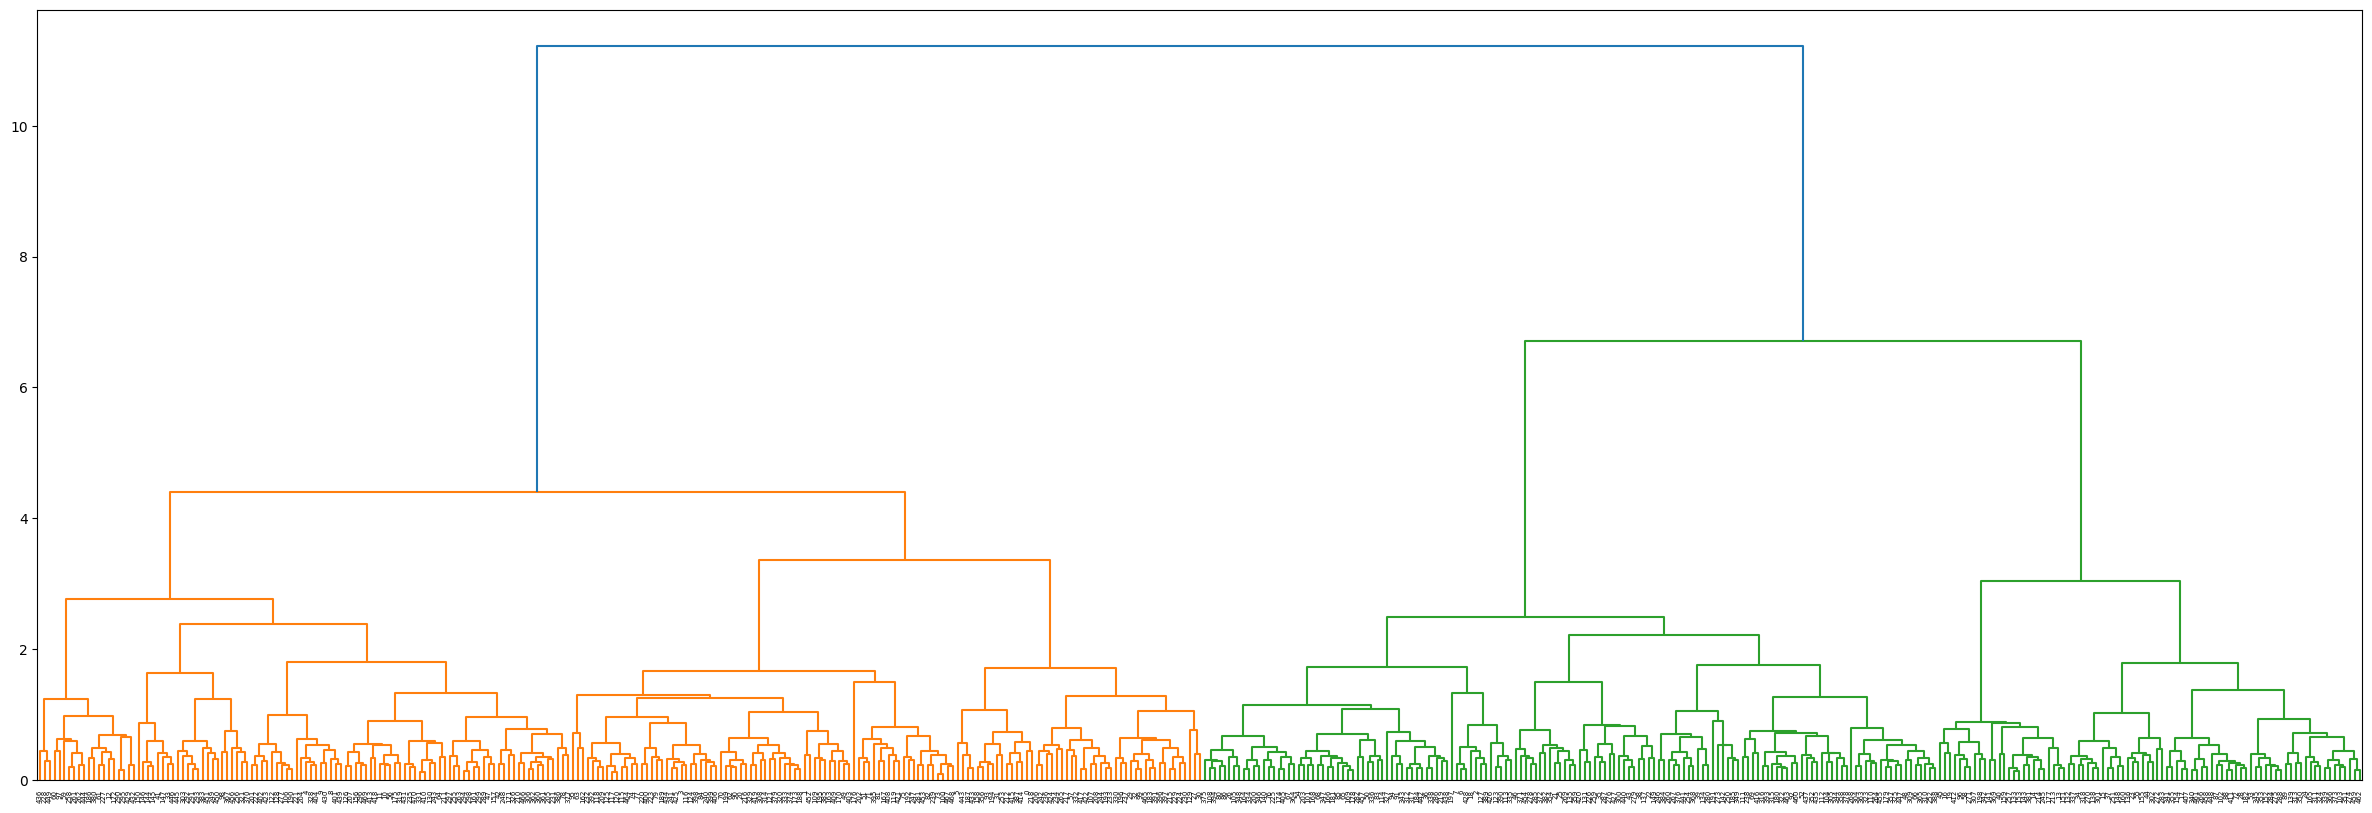

In [235]:
plt.figure(figsize=(30,10))
cont_list = list(df.columns[10:])
cont_list.extend( ['% new stud. from top 10%', '% new stud. from top 25%'])
data = MinMaxScaler().fit_transform(df[cont_list])
linkage_data = linkage(data, metric="euclidean", method="ward")
dendrogram(linkage_data)
plt.show()

According to the dendogram there should be 4 clusters

## C. Cluster Characterization

In [236]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage='ward')
labels = list(hierarchical_cluster.fit_predict(data))
df["Cluster Labels"] = labels

cluster_groups = df.groupby(["Cluster Labels"])
cluster_groups.get_group((0,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

/tmp/ipykernel_5896/1910215814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster Labels"] = labels


,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,128.000000,128.00000,128.00000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0000,128.000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,1.664062,1392.28125,1073.21875,532.40625,14.640625,38.085938,2322.007812,875.382812,6111.085938,7255.804688,1716.8125,1764.375,288.328125,533.429688,1518.742188,57.914062,15.107812,48.898438,0.0
min,1.000000,77.00000,61.00000,27.00000,1.000000,9.000000,249.000000,13.000000,628.000000,1044.000000,640.0000,531.000,10.000000,90.000000,250.000000,8.000000,6.700000,15.000000,0.0
50%,2.000000,802.50000,635.00000,270.50000,14.000000,37.500000,1083.000000,320.000000,7650.000000,7800.000000,1750.0000,1782.500,205.000000,500.000000,1499.000000,58.500000,14.900000,50.000000,0.0
max,2.000000,11054.00000,6397.00000,3524.00000,39.000000,82.000000,16502.000000,21836.000000,11230.000000,11230.000000,3843.0000,3240.000,1030.000000,2340.000000,3700.000000,96.000000,28.800000,91.000000,0.0


In [82]:
cluster_groups.get_group((1,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.0
mean,1.988372,4312.244186,2257.139535,706.337209,53.255814,80.011628,2752.465116,225.0,17580.023256,17580.023256,2876.081395,2583.44186,381.011628,575.127907,957.55814,89.372093,10.117442,83.686047,1.0
min,1.000000,587.000000,501.000000,139.000000,21.000000,49.000000,569.000000,1.0,13750.000000,13750.000000,1623.000000,1770.00000,70.000000,300.000000,300.00000,73.000000,2.900000,59.000000,1.0
50%,2.000000,2891.000000,1716.000000,489.500000,49.000000,82.000000,1852.500000,61.5,17852.500000,17852.500000,2866.000000,2459.00000,272.500000,527.500000,860.00000,91.000000,10.500000,83.000000,1.0
max,2.000000,20192.000000,13007.000000,3810.000000,96.000000,100.000000,14971.000000,3113.0,20100.000000,20100.000000,4816.000000,4541.00000,1836.000000,1495.000000,2210.00000,100.000000,15.200000,100.000000,1.0


In [83]:
cluster_groups.get_group((2,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000,149.000000,149.000000,149.0
mean,2.0,1736.604027,1336.744966,443.557047,26.389262,55.771812,1795.255034,514.483221,11780.187919,11779.516779,2348.697987,2378.342282,281.818792,527.38255,1168.691275,72.369128,13.430201,72.308725,2.0
min,2.0,150.000000,130.000000,82.000000,3.000000,14.000000,309.000000,1.000000,8025.000000,8025.000000,1025.000000,1260.000000,10.000000,330.00000,300.000000,22.000000,4.600000,42.000000,2.0
50%,2.0,1179.000000,922.000000,350.000000,24.000000,56.000000,1337.000000,242.000000,11600.000000,11600.000000,2235.000000,2290.000000,210.000000,500.00000,1000.000000,73.000000,13.200000,72.000000,2.0
max,2.0,11901.000000,8492.000000,2517.000000,67.000000,93.000000,11160.000000,10221.000000,15960.000000,15960.000000,4358.000000,3700.000000,1404.000000,1000.00000,6800.000000,97.000000,27.800000,118.000000,2.0


In [84]:
cluster_groups.get_group((3,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,108.000000,108.000000,108.00,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.0
mean,1.222222,6245.935185,4083.25,1599.342593,26.0,56.907407,8117.796296,1551.333333,3529.407407,7269.703704,2121.212963,1824.490741,619.027778,575.527778,1546.666667,79.62037,16.401852,61.574074,3.0
min,1.000000,355.000000,300.00,142.000000,1.0,13.000000,509.000000,11.000000,608.000000,3040.000000,830.000000,1000.000000,20.000000,96.000000,500.000000,53.00000,7.800000,31.000000,3.0
50%,1.000000,4896.000000,3092.50,1094.500000,23.5,57.000000,5802.500000,1179.000000,2772.500000,6825.000000,1984.000000,1810.000000,511.000000,597.500000,1425.000000,80.50000,16.650000,62.500000,3.0
max,2.000000,48094.000000,26330.00,6392.000000,75.0,95.000000,31643.000000,7152.000000,10060.000000,15516.000000,3764.000000,3000.000000,3247.000000,1125.000000,3324.000000,103.00000,24.700000,99.000000,3.0


## D. Categorical Analysis

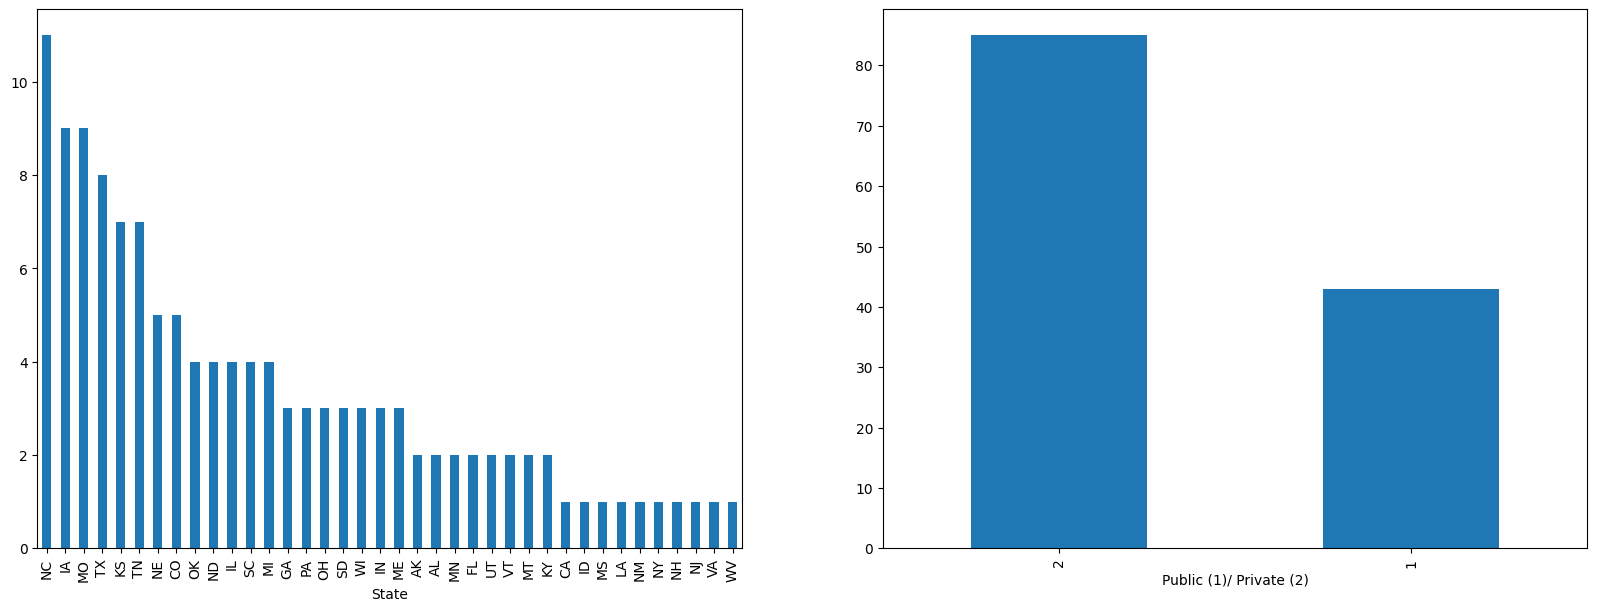

In [85]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,7) )
counts_state = cluster_groups.get_group((0,))["State"].value_counts()
counts_state.plot(kind='bar', ax=axes[0])
counts_type  = cluster_groups.get_group((0,))["Public (1)/ Private (2)"].value_counts()
counts_type.plot(kind='bar', ax=axes[1])
plt.show()

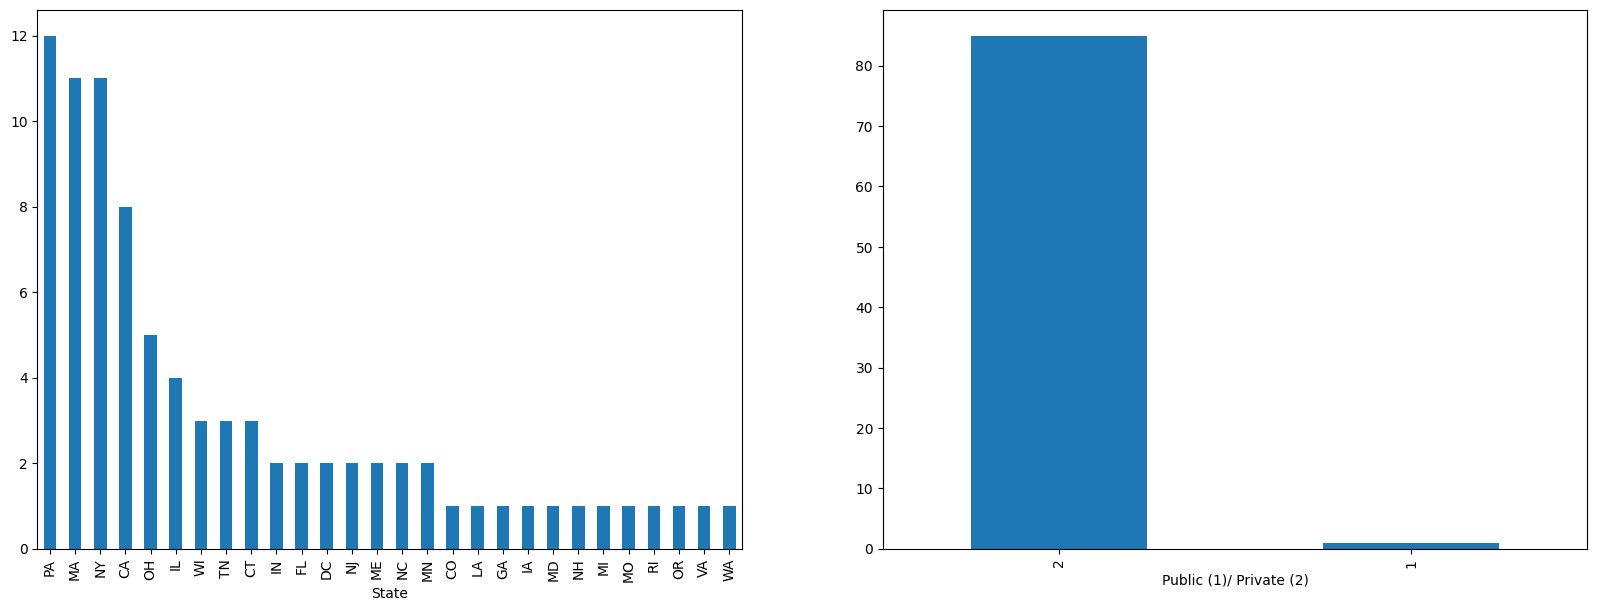

In [86]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,7) )
counts_state = cluster_groups.get_group((1,))["State"].value_counts()
counts_state.plot(kind='bar', ax=axes[0])
counts_type  = cluster_groups.get_group((1,))["Public (1)/ Private (2)"].value_counts()
counts_type.plot(kind='bar', ax=axes[1])
plt.show()

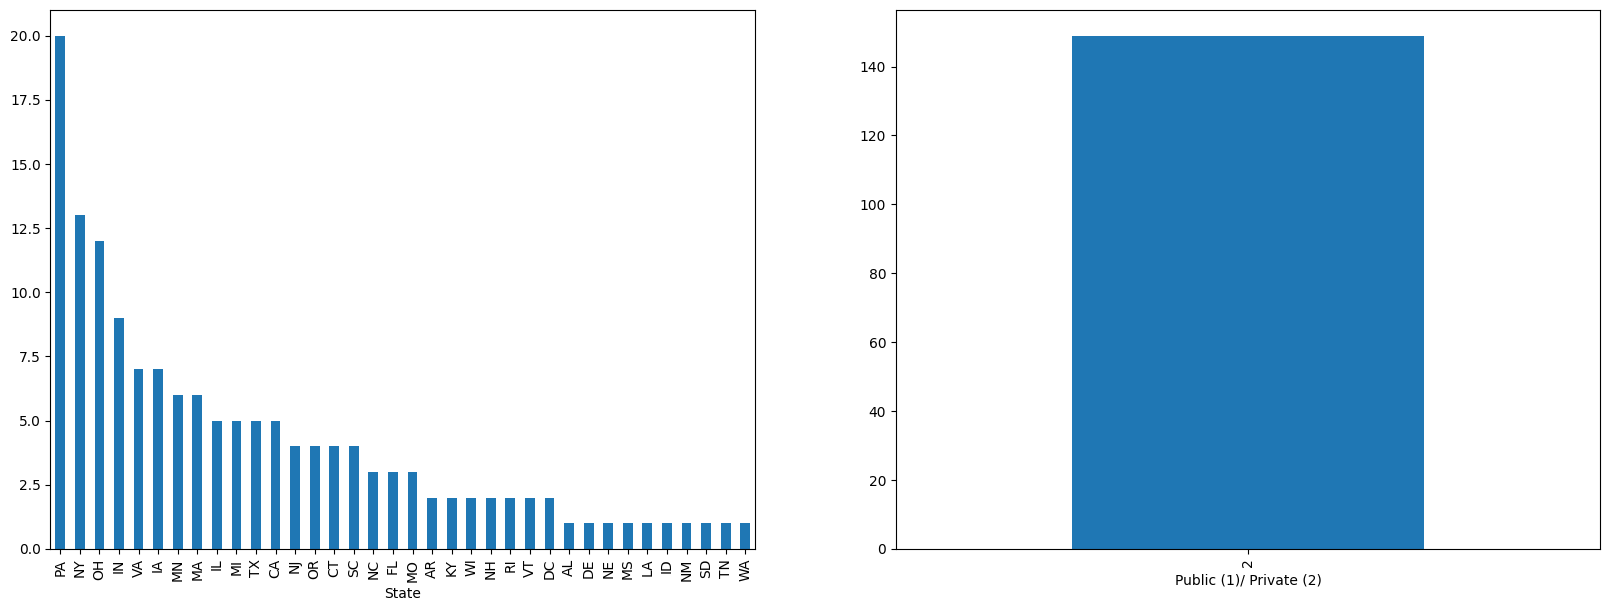

In [87]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,7) )
counts_state = cluster_groups.get_group((2,))["State"].value_counts()
counts_state.plot(kind='bar', ax=axes[0])
counts_type  = cluster_groups.get_group((2,))["Public (1)/ Private (2)"].value_counts()
counts_type.plot(kind='bar', ax=axes[1])
plt.show()

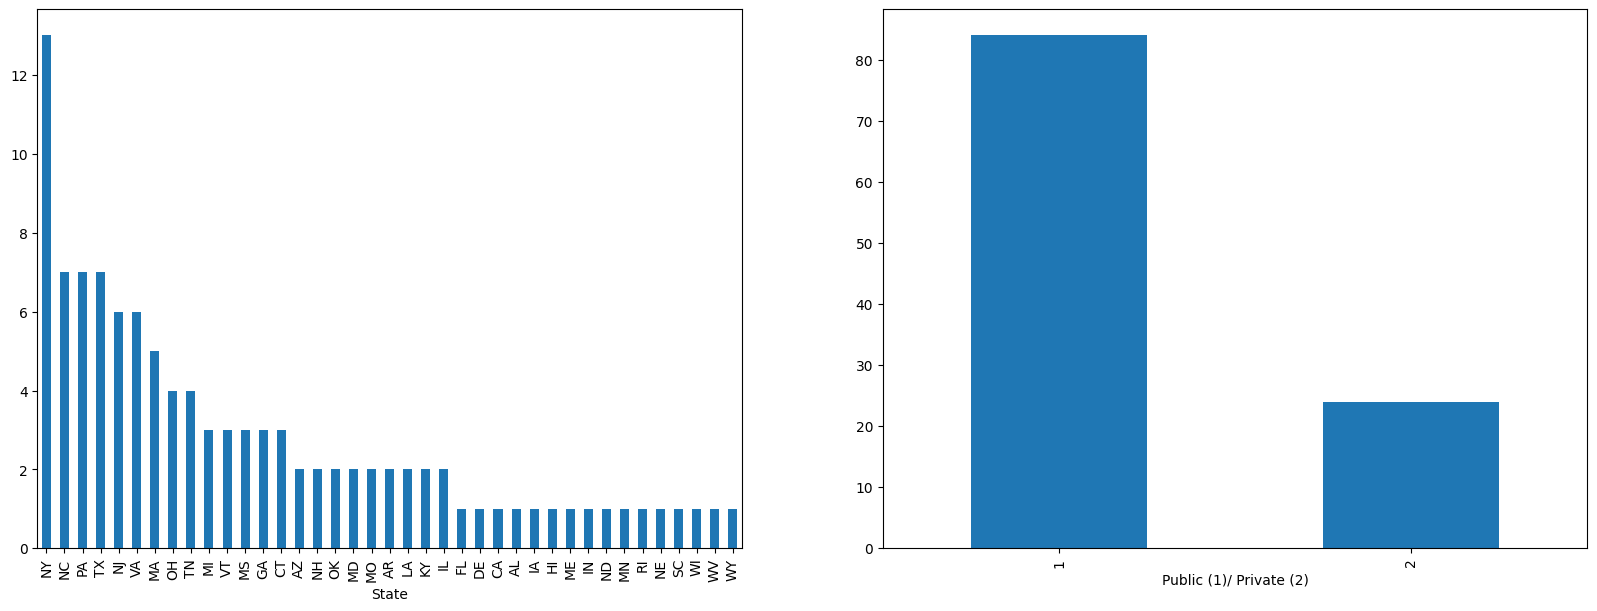

In [88]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,7) )
counts_state = cluster_groups.get_group((3,))["State"].value_counts()
counts_state.plot(kind='bar', ax=axes[0])
counts_type  = cluster_groups.get_group((3,))["Public (1)/ Private (2)"].value_counts()
counts_type.plot(kind='bar', ax=axes[1])
plt.show()

The last cluster is the only one with mostly public schools all other are mostly private schools with the second cluster also having the least amount variety within their state list.  
The thrid cluster also seems to have the most amount of schools but all are private as opposed to having some vairety with the other clusters

## E. External Information

We could look into the majors that they offer or the amount fo majors that they offer so that we get more context for the variety of students going into whichever university.  
We could also look into the scholarships that are given, financial aid to be more exact, so that we can see where the students are getting the most aid for their degree which might cause students to prefer one type of school over the other.

## F. Missing Data Manipulation

In [237]:
harvard.insert(column="Cluster Labels", value=np.nan, loc=20)
harvard

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,...,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
451,Harvard University,MA,2,13865.0,2165.0,1606.0,90.0,100.0,6862.0,320.0,...,18485.0,3370.0,3040.0,1335.0,500.0,1920.0,97.0,9.9,100.0,NaN


In [147]:
df = df._append(harvard)

In [222]:
cont_list

['in-state tuition',
 'out-of-state tuition',
 'room',
 'board',
 'add. fees',
 'estim. book costs',
 'estim. personal $',
 '% fac. w/PHD',
 'stud./fac. ratio',
 'Graduation rate',
 '% new stud. from top 10%',
 '% new stud. from top 25%']

In [229]:
cluster1 = cluster_groups.get_group((0,))[cont_list].describe().loc[["mean"]]
cluster2 = cluster_groups.get_group((1,))[cont_list].describe().loc[["mean"]]
cluster3 = cluster_groups.get_group((2,))[cont_list].describe().loc[["mean"]]
cluster4 = cluster_groups.get_group((3,))[cont_list].describe().loc[["mean"]]

def find_distance(cluster, values):
    total_sum = 0
    for column in cluster.columns:
        total_sum += (cluster[column].values[0] -  values[column].values[0])**2

    total_sum = np.sqrt(total_sum)
    print(total_sum)

find_distance(cluster1, harvard)
find_distance(cluster2, harvard)
find_distance(cluster3, harvard)
find_distance(cluster4, harvard)

16877.208022100396
1983.5506387923635
9647.831501223764
18792.419347371306


Harvard is closest to the third cluster

In [243]:
harvard_copy = harvard.copy()

for col in cont_list:
    if np.isnan(harvard_copy[col].values[0]):
        print(col)
        harvard_copy[col] = cluster3[col]

harvard_copy

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,...,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
451,Harvard University,MA,2,13865.0,2165.0,1606.0,90.0,100.0,6862.0,320.0,...,18485.0,3370.0,3040.0,1335.0,500.0,1920.0,97.0,9.9,100.0,NaN


# Question 2: Pharmaceutical Industry

In [245]:
import dmba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [316]:
df = dmba.load_data('Pharmaceuticals.csv')
df

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


## A. Use only the numerical variables (1–9) to cluster the 21 firms. Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.

In [269]:
df.describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,57.651429,0.525714,25.461905,25.795238,10.514286,0.700000,0.585714,13.370952,15.695238
std,58.602960,0.256741,16.310257,15.084975,5.321399,0.216795,0.781310,11.048335,6.562048
min,0.410000,0.180000,3.600000,3.900000,1.400000,0.300000,0.000000,-3.170000,2.600000
25%,6.300000,0.350000,18.900000,14.900000,5.700000,0.600000,0.160000,6.380000,11.200000
50%,48.190000,0.460000,21.500000,22.600000,11.200000,0.600000,0.340000,9.370000,16.100000
75%,73.840000,0.650000,27.900000,31.000000,15.000000,0.900000,0.600000,21.870000,21.100000
max,199.470000,1.110000,82.500000,62.900000,20.300000,1.100000,3.510000,34.210000,25.500000


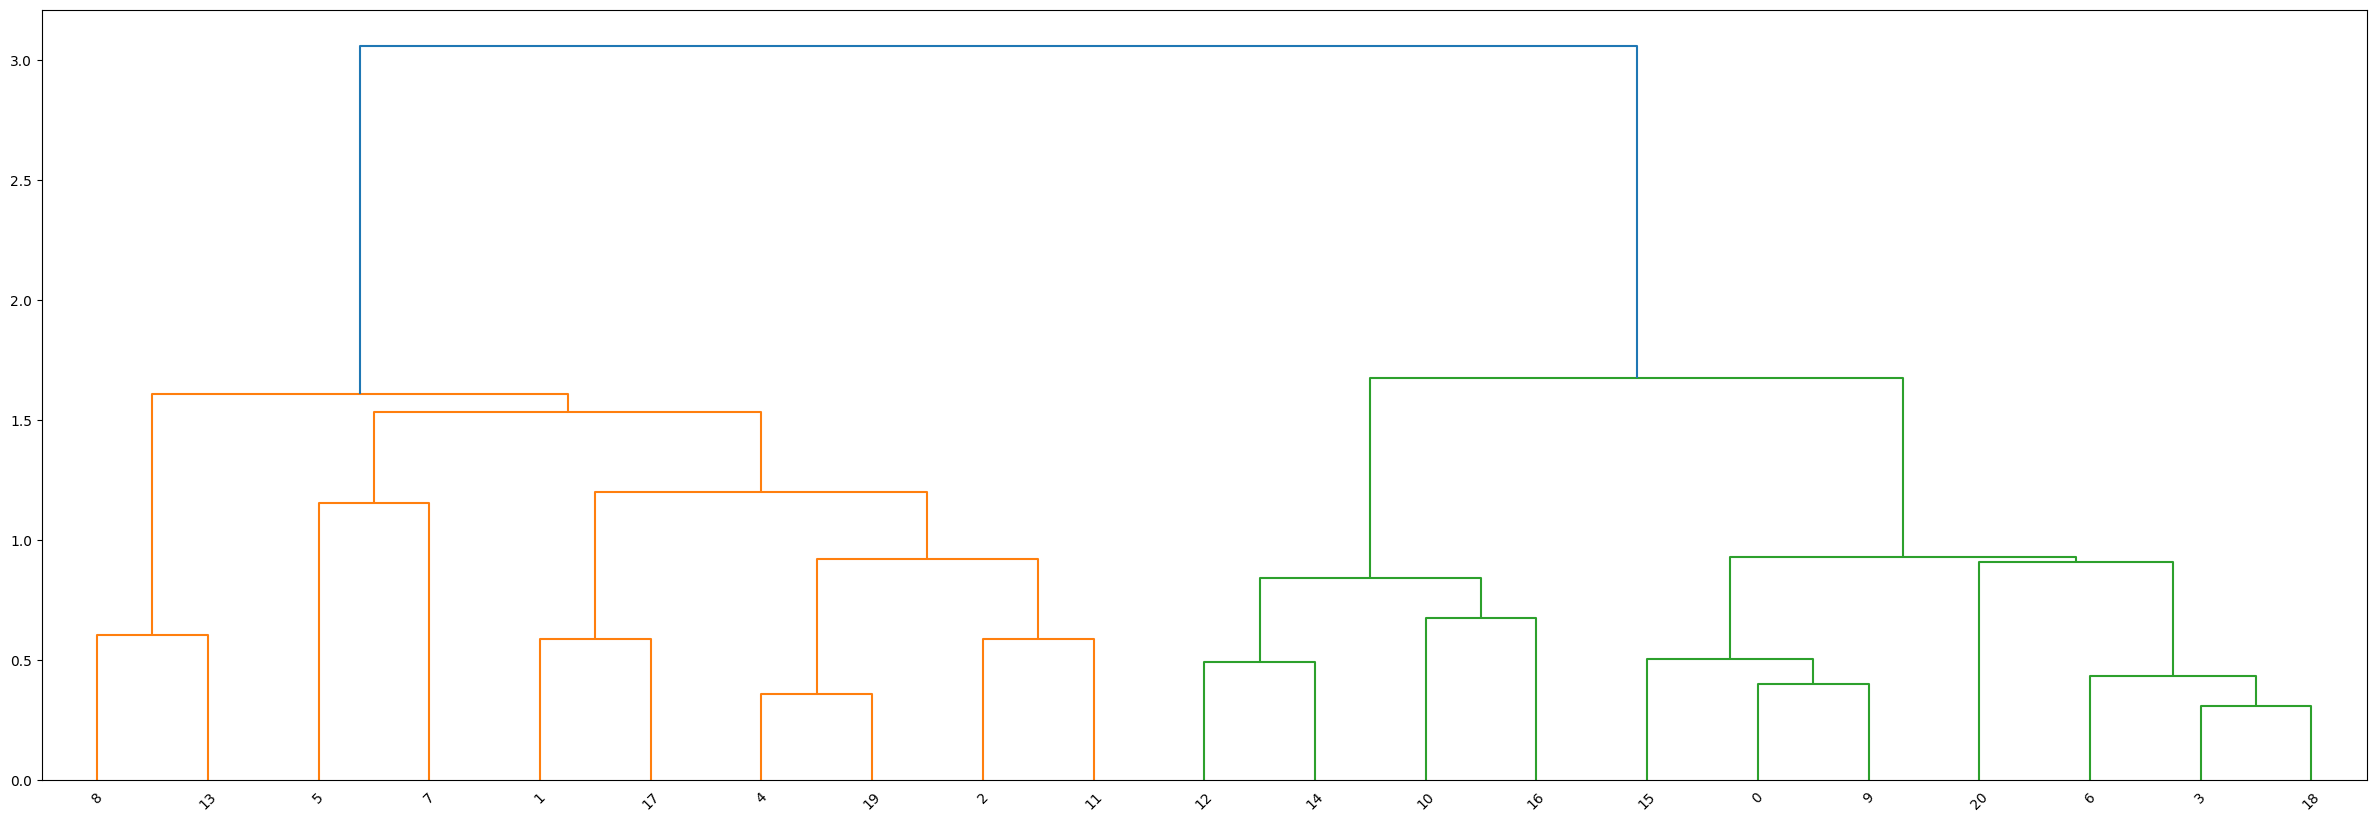

In [320]:
plt.figure(figsize=(30,10))
cont_list = list(df.columns[2:11])
data = MinMaxScaler().fit_transform(df[cont_list])
linkage_data = linkage(data, metric="euclidean", method="ward")
dendrogram(linkage_data)
plt.show()

With the dendogram There is a good amount of clusters if they were split into three parts.

In [321]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage='ward')
labels = list(hierarchical_cluster.fit_predict(data))
df["Cluster Labels"] = labels
df

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,Cluster Labels
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,1
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,0
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,0
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,1
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,0
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE,0
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE,1
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ,0
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE,0
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE,1


## B.Interpret the clusters with respect to the categorical variables used in forming the clusters

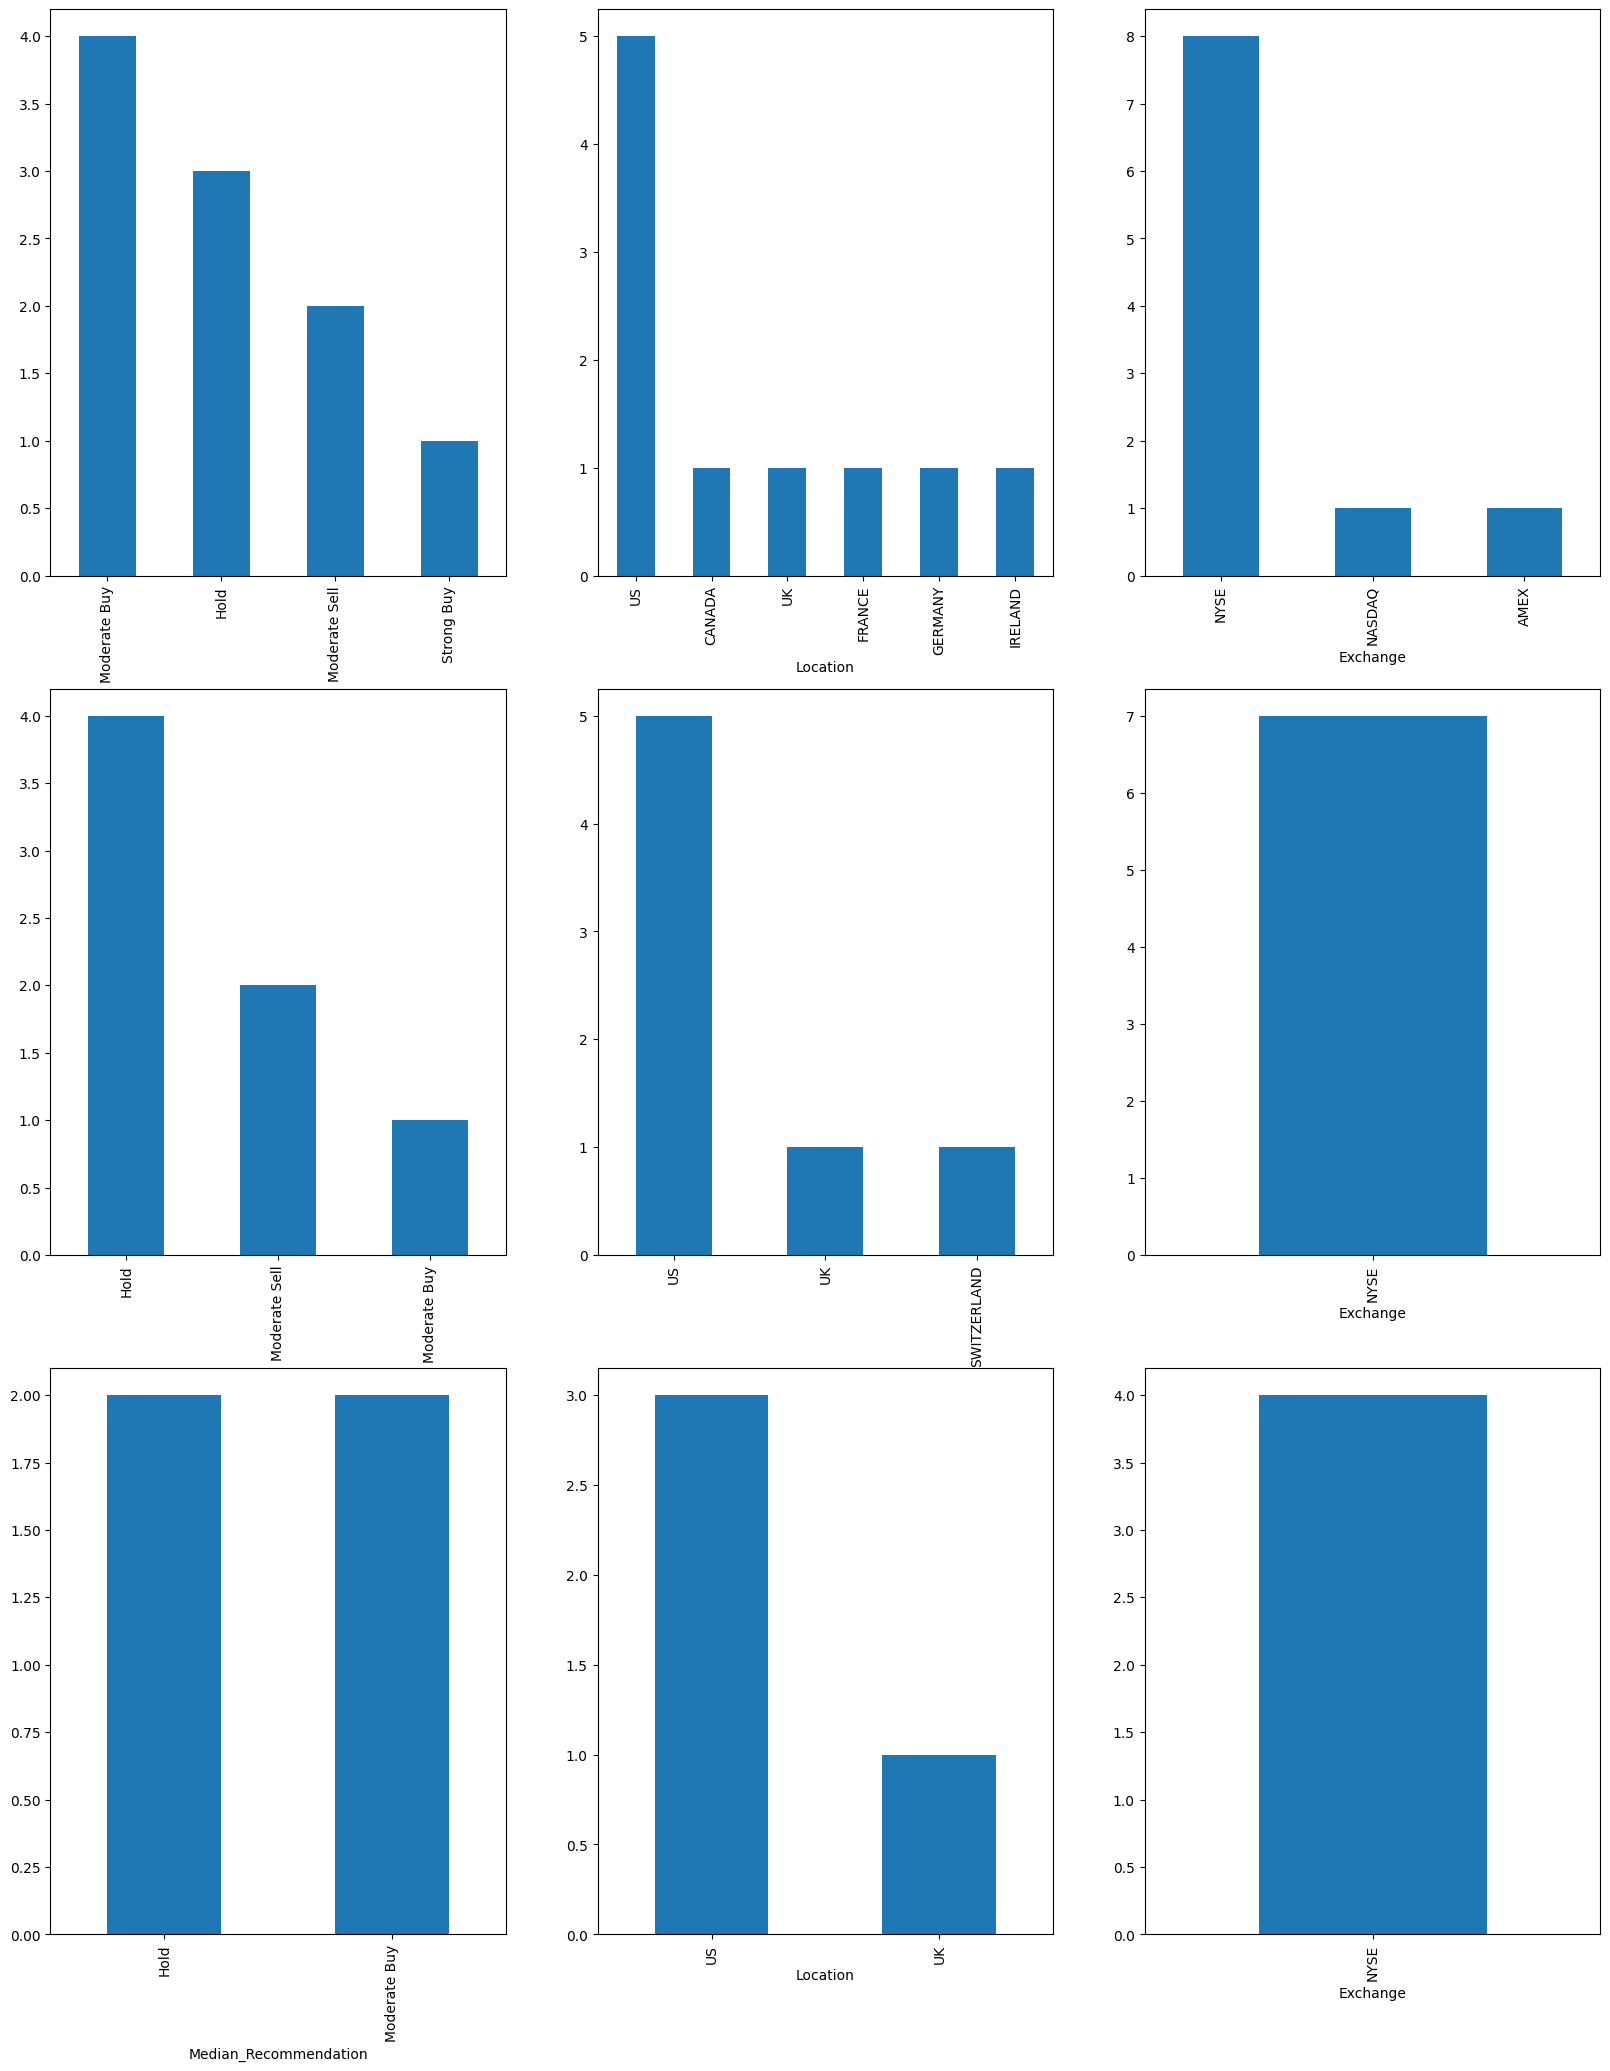

In [322]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,25) )
cat_list = df.columns.values[11:14]
cluster_groups = df.groupby(["Cluster Labels"])
axes= axes.flatten()
current_ax = 0;

for i in range(0,3):
    for col in cat_list:
        counts = cluster_groups.get_group((i,))[col].value_counts()
        counts.plot(kind='bar', ax=axes[current_ax])
        current_ax+=1

plt.show()


In [305]:
cluster_groups.get_group((0,)).describe().loc[["mean", 'min', 'max']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster Labels
mean,14.243,0.627,30.42,14.9,5.63,0.59,0.872,16.898,10.77,0.0
min,0.410,0.240,3.60,3.9,1.40,0.30,0.000,-3.170,2.60,0.0
max,56.240,1.110,82.50,24.1,7.80,0.90,3.510,34.210,21.30,0.0


In [308]:
cluster_groups.get_group((1,)).describe().loc[["mean", 'min', 'max']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster Labels
mean,62.882857,0.407143,20.228571,30.714286,13.385714,0.714286,0.385714,5.382857,20.514286,1.0
min,34.100000,0.180000,13.100000,17.900000,11.200000,0.500000,0.000000,-2.690000,16.100000,1.0
max,96.650000,0.630000,27.900000,54.900000,15.400000,0.900000,1.120000,15.000000,25.500000,1.0


In [307]:
cluster_groups.get_group((2,)).describe().loc[["mean", 'min', 'max']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster Labels
mean,157.0175,0.48,22.225,44.425,17.7,0.95,0.22,18.5325,19.575,2.0
min,122.1100,0.35,18.000,28.600,15.0,0.80,0.10,9.3700,14.100,2.0
max,199.4700,0.65,28.400,62.900,20.3,1.10,0.34,25.5400,25.200,2.0


## C. Is there a pattern in the clusters with respect to the numerical variables (10–12)? (those not used in forming the clusters).

Not much data can be interpreted from the Location of all the values nor about the exchange since most are NYSE.  
Although the Median Recommendation is better determinant of cluster as its more varied but not by much

## D.Provide an appropriate name for each cluster using any or all of the variables in the dataset.

0 - Low Average (Market Cap, ROE, ROA, Net Profit)  
1 - High Average Revenue Growth  
2 - High Average Market Cap  

# Customer Rating of Breakfast Cereals

In [310]:
import dmba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [325]:
df = dmba.load_data('Cereals.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [326]:
df = df.dropna(axis=0, how='any')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


## Apply hierarchical clustering to the data using Euclidean distance to the normalized measurements. Compare the dendrograms from single linkage and complete linkage, and look at cluster centroids. Comment on the structure of the clusters and on their stability.

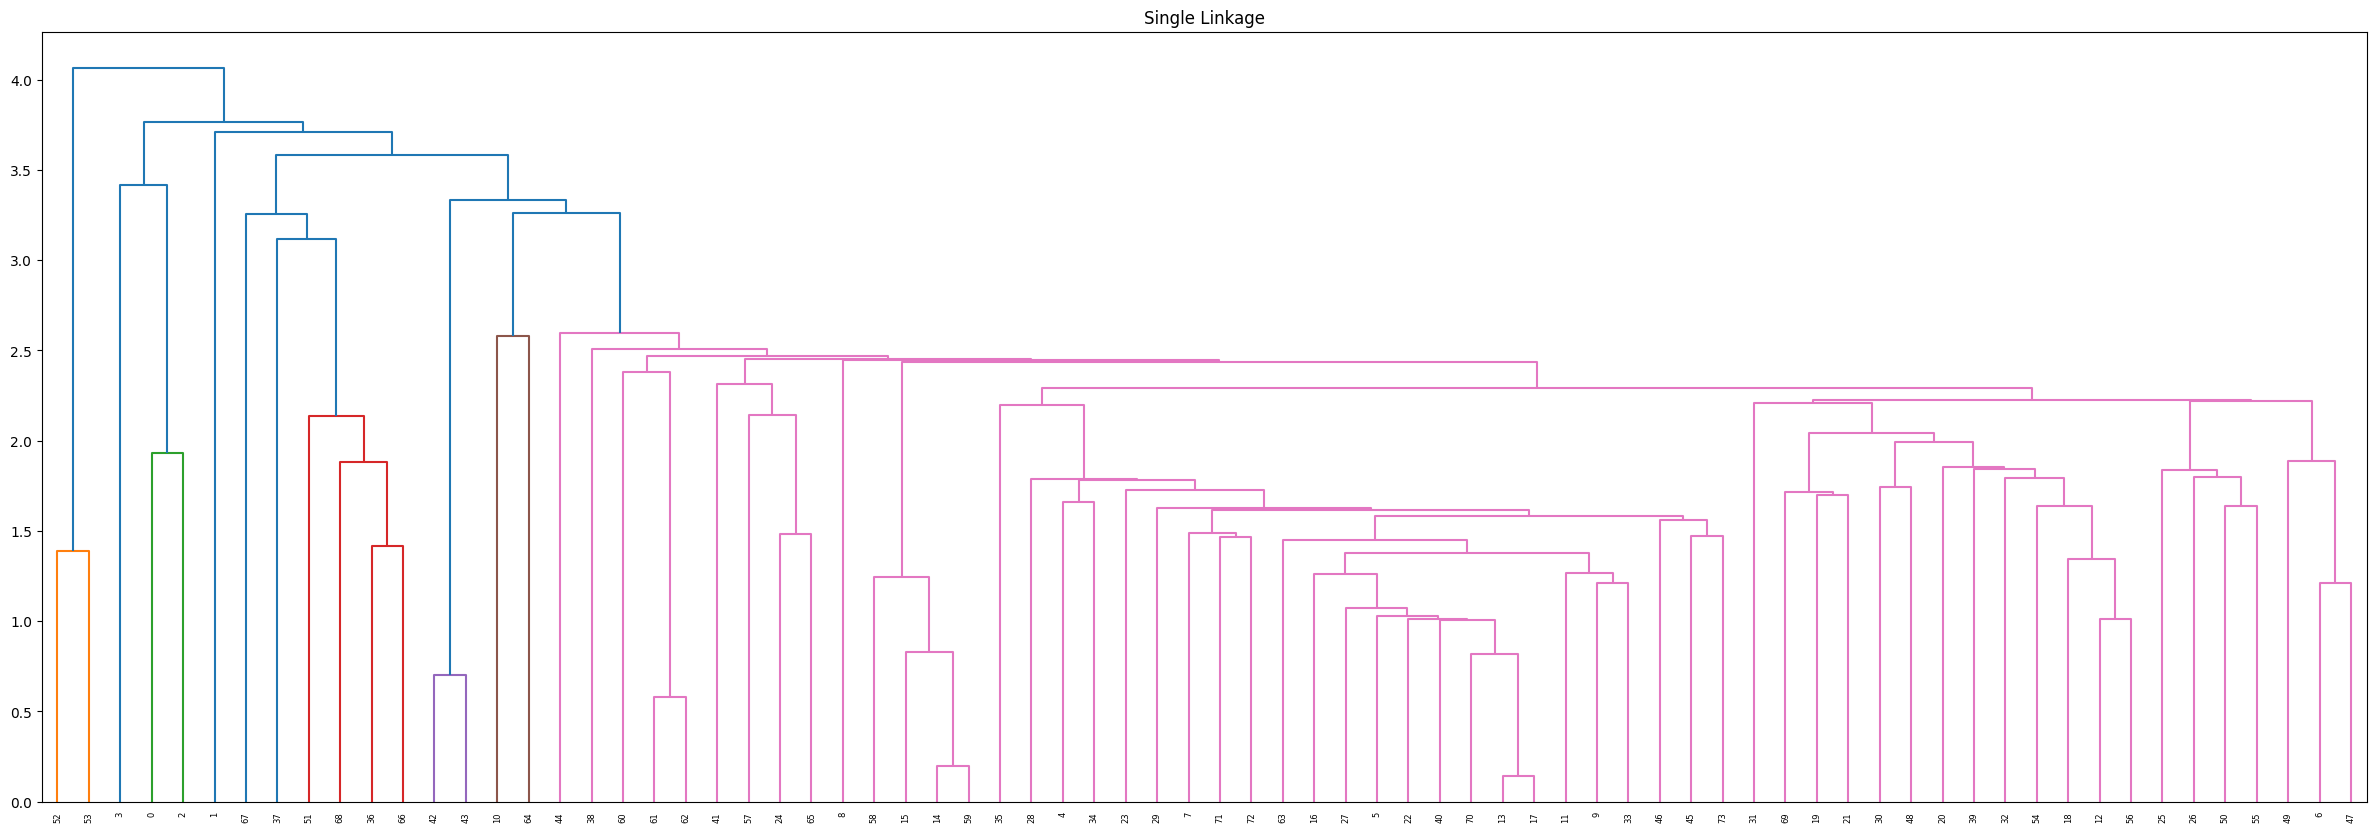

In [338]:
cont_list = df.columns.values[3:]
data = StandardScaler().fit_transform(df[cont_list])
plt.figure(figsize=(30,10))
plt.title("Single Linkage")
linkage_data = linkage(data, metric="euclidean", method="single")
dendrogram(linkage_data)
plt.show()

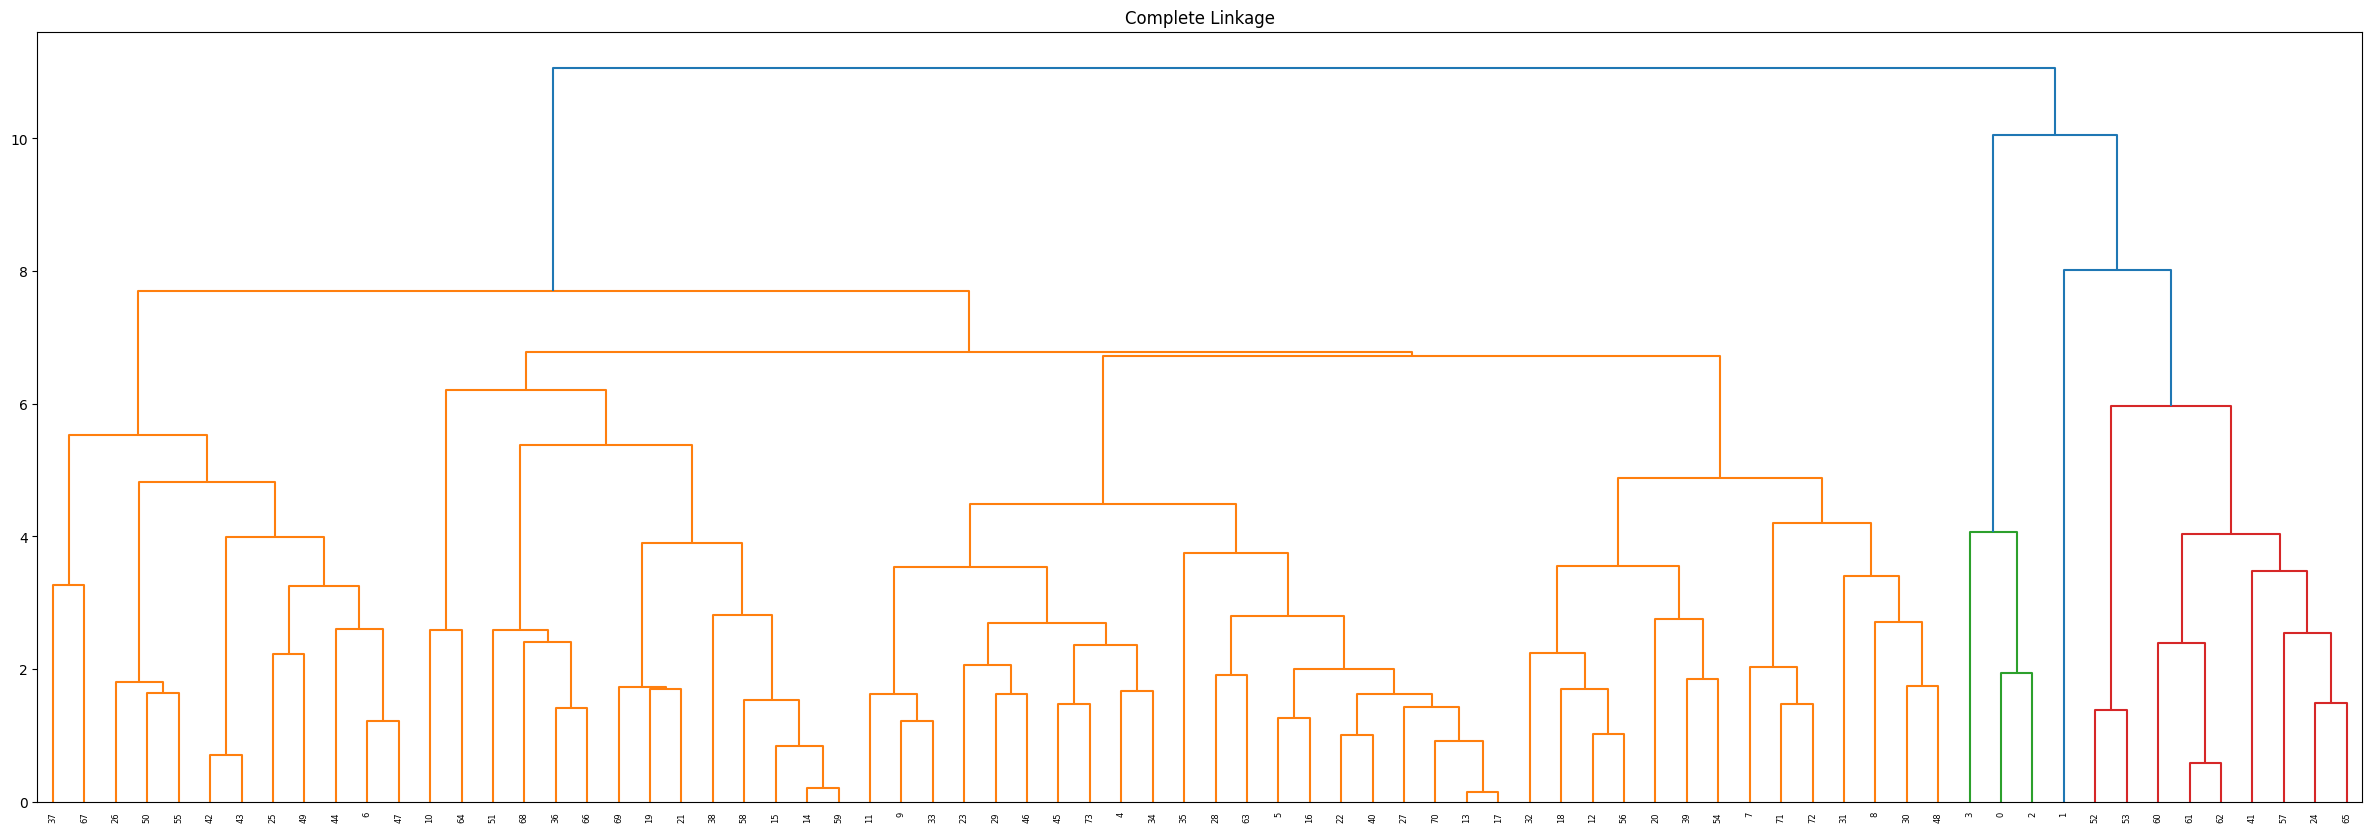

In [337]:
plt.figure(figsize=(30,10))
plt.title("Complete Linkage")
linkage_data = linkage(data, metric="euclidean", method="complete")
dendrogram(linkage_data)
plt.show()

In [340]:
hierarchical_cluster_single = AgglomerativeClustering(n_clusters=9, metric="euclidean", linkage='single')
hierarchical_cluster_complete = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage='complete')
single = list(hierarchical_cluster_single.fit_predict(data))
complete = list(hierarchical_cluster_complete.fit_predict(data))

df["Single"] = single
df["Complete"] = complete

/tmp/ipykernel_5896/587014136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Single"] = single
/tmp/ipykernel_5896/587014136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Complete"] = complete


In [362]:
singles = df.groupby("Single")
singles_table = pd.DataFrame(singles.get_group(0).describe().loc["mean"])
singles_table.loc[-1] = (singles.get_group(1).describe().loc["mean"])
singles_table

,mean
calories,112.000000
protein,2.600000
fat,0.800000
sodium,212.000000
fiber,1.400000
carbo,18.800000
sugars,4.800000
potass,69.000000
vitamins,100.000000
shelf,3.000000
